In [19]:
%matplotlib notebook
import numpy as np
import time
import matplotlib.pyplot as plt
import scipy.stats as sc

In [20]:
# !pip install serial
import serial

In [26]:
from serial import Serial
ser.close()
ser = serial.Serial('COM3', 9600)

In [39]:
for i in range(15):
    ser_bytes=ser.readline()
#     print(ser_bytes[0:len(ser_bytes)-2].decode("utf-8"))
    print(ser_bytes)
    time.sleep(0.3)

b'468\t453\r\n'
b'468\t453\r\n'
b'468\t453\r\n'
b'468\t453\r\n'
b'468\t453\r\n'
b'468\t453\r\n'
b'468\t453\r\n'
b'468\t453\r\n'
b'468\t453\r\n'
b'468\t453\r\n'
b'468\t453\r\n'
b'468\t454\r\n'
b'468\t454\r\n'
b'468\t453\r\n'
b'468\t453\r\n'


In [36]:
k=ser_bytes
print(ser_bytes.split())
print(int(ser_bytes.split()[0])) 
#         sensor2.append(int(ser_bytes.split()[1]))

[b'459', b'2']
459


In [26]:
#Angles to be passed to the servo motor
# ser1.write(bytes([err_angle]))
# old_angle1 = int.from_bytes(ser1.readline(), byteorder='little')


# This is the code for the serial read and write.
# i=0
# for modem in PortList:
#     for port in modem:
#         try:
#             ser = serial.Serial(port, 9600, timeout=1)
#             ser.close()
#             ser.open()
#             ser.write("ati")
#             time.sleep(3)
#             read_val = ser.read(size=64)
#             print read_val
#             if read_val is not '':
#                 print port
#         except serial.SerialException:
#             continue
#         i+=1

# Anomaly Observation after 60 sec

<IPython.core.display.Javascript object>


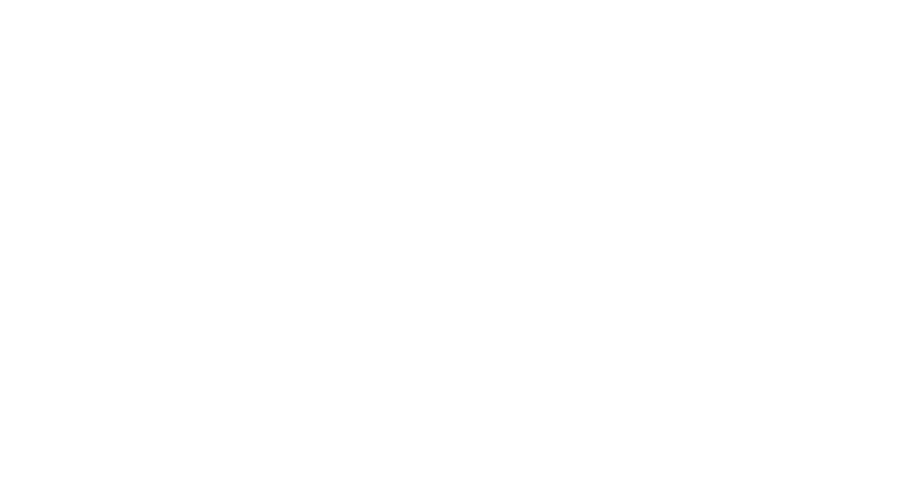

Keyboard Interrupt


In [44]:
ser.flushInput()
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.set_title("Moisture")
ax.set_xlabel('time (s)')
ax.set_ylabel('Moisture')
sensor1=[]
sensor2=[]
timelog=[]
start = time.time()
ser_bytes = ser.readline()
ser.close()
ser.open()
while True:
    try:
        ser_bytes = ser.readline()
        ser_bytes = ser.readline()
        sensor1.append(int(ser_bytes.split()[0])) 
        sensor2.append(int(ser_bytes.split()[1]))
        timelog.append(round(time.time()- start, 2))   
        ax.clear()
        ax.plot(timelog, sensor1,label="Sensor1")
        ax.plot(timelog, sensor2,label="Sensor2")
        ax.set_title("Moisture")
        ax.set_xlabel('time (s)')
        ax.set_ylabel('Moisture')
        fig.canvas.draw()
    except KeyboardInterrupt:
        print("Keyboard Interrupt")
        break

# Correlation of the data

In [45]:
len(sensor1)

1993

In [46]:
len(sensor2)

1993

In [52]:
P=sc.pearsonr(sensor1, sensor2)


# Since there is outlier, pearson correlation is not great.

# Spearman correlation is good for outlier. Correlation does not imply Casuality.

In [53]:
P=sc.pearsonr(sensor1, sensor2)
S=sc.spearmanr(sensor1, sensor2)
print("Pearson and Spearman Correlation coefficients are", P[0],S[0])

Pearson and Spearman Correlation coefficients are -0.00038271371660362905 0.28370463022870446


<IPython.core.display.Javascript object>


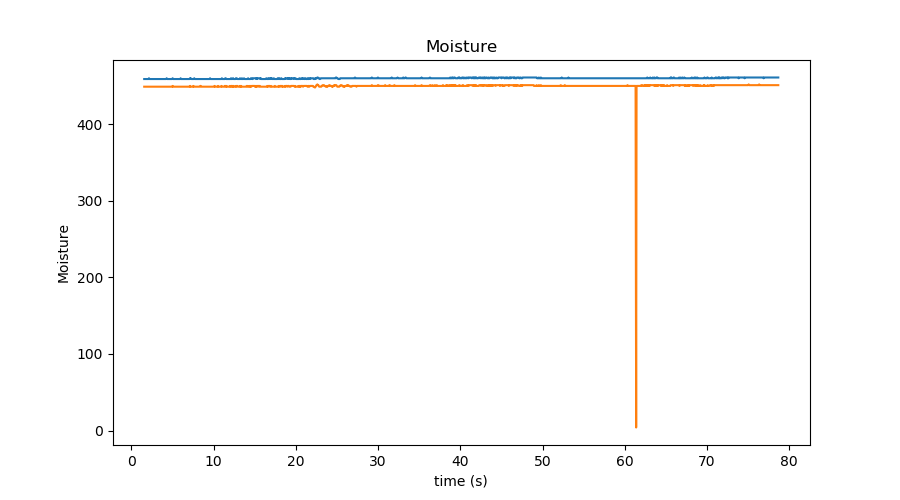

IndexError: list index out of range

In [54]:
ser.flushInput()
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.set_title("Moisture")
ax.set_xlabel('time (s)')
ax.set_ylabel('Moisture')
sensor1=[]
sensor2=[]
timelog=[]
start = time.time()
ser_bytes = ser.readline()
ser.close()
ser.open()
while True:
    try:
        ser_bytes = ser.readline()
        ser_bytes = ser.readline()
        sensor1.append(int(ser_bytes.split()[0])) 
        sensor2.append(int(ser_bytes.split()[1]))
        timelog.append(round(time.time()- start, 2))   
        ax.clear()
        ax.plot(timelog, sensor1,label="Sensor1")
        ax.plot(timelog, sensor2,label="Sensor2")
        ax.set_title("Moisture")
        ax.set_xlabel('time (s)')
        ax.set_ylabel('Moisture')
        fig.canvas.draw()
    except KeyboardInterrupt:
        print("Keyboard Interrupt")
        break

<IPython.core.display.Javascript object>


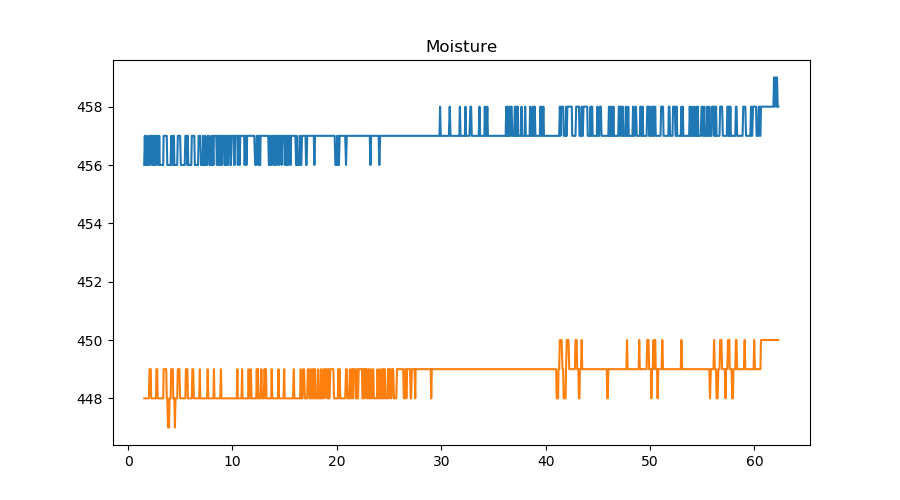

Keyboard Interrupt


In [55]:
ser.flushInput()
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.set_title("Moisture")
ax.set_xlabel('time (s)')
ax.set_ylabel('Moisture')
sensor1=[]
sensor2=[]
timelog=[]
start = time.time()
ser_bytes = ser.readline()
ser.close()
ser.open()
while True:
    try:
        ser_bytes = ser.readline()
        ser_bytes = ser.readline()
        sensor1.append(int(ser_bytes.split()[0])) 
        sensor2.append(int(ser_bytes.split()[1]))
        timelog.append(round(time.time()- start, 2))   
        ax.clear()
        ax.plot(timelog, sensor1,label="Sensor1")
        ax.plot(timelog, sensor2,label="Sensor2")
        ax.set_title("Moisture")
        ax.set_xlabel('time (s)')
        ax.set_ylabel('Moisture')
        fig.canvas.draw()
    except KeyboardInterrupt:
        print("Keyboard Interrupt")
        break

In [56]:
P=sc.pearsonr(sensor1, sensor2)
S=sc.spearmanr(sensor1, sensor2)
print("Pearson and Spearman Correlation coefficients are", P[0],S[0])

Pearson and Spearman Correlation coefficients are 0.602074111665311 0.5835711007179473


# Since there are no outliers, pearson correlation is giving decent results.

In [57]:
# def ToRatio(value, leftMin=1023, leftMax=465, rightMin=0, rightMax=100):
#     leftSpan = leftMax - leftMin
#     rightSpan = rightMax - rightMin

#     # Convert the left range into a 0-1 range (float)
#     valueScaled = float(value - leftMin) / float(leftSpan)

#     # Convert the 0-1 range into a value in the right range.
#     return rightMin + (valueScaled * rightSpan)
# ser.flushInput()
# fig = plt.figure(figsize=(9,5))
# ax = fig.add_subplot(111)
# ax.set_title("Moisture")
# ax.set_xlabel('time (s)')
# ax.set_ylabel('Moisture')
# plt.ion()
# moistlog = []
# timelog = []
# start = time.time()
# while True:
#     try:
#         ser_bytes = ser.readline()
#         decoded_bytes = float(ser_bytes[0:len(ser_bytes)-2].decode("utf-8"))
#         moistlog.append(ToRatio(decoded_bytes)) 
#         timelog.append(round(time.time()- start, 2))
#         if len(moistlog) > 100:
#             del moistlog[0]
#             del timelog[0]        
#         ax.clear()
#         ax.plot(timelog, moistlog)
#         ax.set_title("Moisture")
#         ax.set_xlabel('time (s)')
#         ax.set_ylabel('Moisture')
#         fig.canvas.draw()
#     except KeyboardInterrupt:
#         print("Keyboard Interrupt")
#         break